# Proyecto de Predicción de Cancelación de Clientes - Interconnect

---

## **Paso 1: Carga y exploración inicial de los datos**

### **1.1 Cargar los datos**
Importamos las bibliotecas necesarias y cargamos los archivos CSV en DataFrames

In [173]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

In [4]:
# Cargar los datos
contract_df = pd.read_csv('contract.csv')
personal_df = pd.read_csv('personal.csv')
internet_df = pd.read_csv('internet.csv')
phone_df = pd.read_csv('phone.csv')

In [6]:
# Mostrar confirmación de carga
contract_df.shape, personal_df.shape, internet_df.shape, phone_df.shape

((7043, 8), (7043, 5), (5517, 8), (6361, 2))

### **1.2 Inspeccionar las primeras filas**
Observamos una muestra de cada conjunto de datos.

In [22]:
# Mostrar las primeras filas de cada DataFrame
contract_df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [12]:
personal_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [14]:
internet_df.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [16]:
phone_df.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


### **1.3 Revisar estructura y tipos de datos**
Verificamos la cantidad de filas y columnas, así como los tipos de datos.

In [24]:
# Información general de cada DataFrame
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [26]:
personal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [28]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [30]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


### **1.4 Identificar valores nulos**
Buscamos valores faltantes en cada conjunto de datos.

In [114]:
print("Valores nulos en contract_df:\n", 
      contract_df.isnull().sum())

Valores nulos en contract_df:
 customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


In [116]:
print("Valores nulos en personal_df:\n", 
      personal_df.isnull().sum())

Valores nulos en personal_df:
 customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64


In [118]:
print("Valores nulos en internet_df:\n", 
      internet_df.isnull().sum())

Valores nulos en internet_df:
 customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64


In [120]:
print("Valores nulos en phone_df:\n", 
      phone_df.isnull().sum())

Valores nulos en phone_df:
 customerID       0
MultipleLines    0
dtype: int64


### **1.5 Buscar inconsistencias**

In [42]:
# Buscar duplicados
contract_df.duplicated().sum(), personal_df.duplicated().sum(), internet_df.duplicated().sum(), phone_df.duplicated().sum()

(0, 0, 0, 0)

---
## **Paso 2: Análisis exploratorio de los datos (EDA)**
En este paso profundizaremos en los datos para identificar patrones y características clave.

### **2.1 Análisis descriptivo básico**
Obtenemos estadísticas descriptivas para comprender mejor los datos.

In [46]:
# Estadísticas descriptivas
contract_df.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [48]:
personal_df.describe()

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [50]:
internet_df.describe()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [52]:
phone_df.describe()

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


### **2.2 Distribución de la variable objetivo ('EndDate')**
Observamos la distribución de la variable 'EndDate' para ver cuántos clientes se dan de baja.

In [54]:
# Distribución de 'EndDate'
contract_df['EndDate'].value_counts()

EndDate
No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: count, dtype: int64

### **2.3 Visualización de algunas distribuciones clave**
Realizamos visualizaciones para observar la distribución de variables importantes.

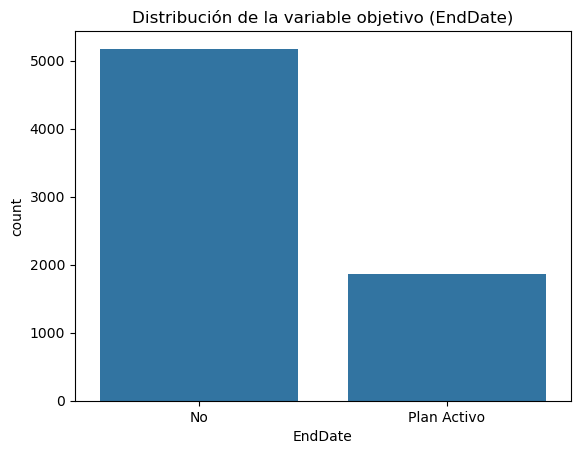

In [240]:
# Reemplazar las fechas por "Sí" en lugar de las fechas específicas
contract_df['EndDate'] = contract_df['EndDate'].apply(lambda x: 'Plan Activo' if x != 'No' else 'No')

# Graficar la distribución de la variable objetivo (EndDate)
sns.countplot(data=contract_df, x='EndDate')
plt.title('Distribución de la variable objetivo (EndDate)')
plt.show()

<Figure size 800x600 with 0 Axes>

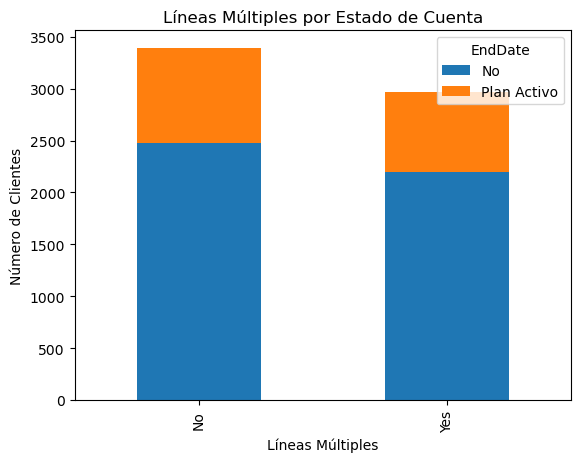

In [276]:
plt.figure(figsize=(8, 6))
pd.crosstab(phone_df['MultipleLines'], contract_df['EndDate']).plot(kind='bar', stacked=True)
plt.title('Líneas Múltiples por Estado de Cuenta')
plt.xlabel('Líneas Múltiples')
plt.ylabel('Número de Clientes')
plt.show()

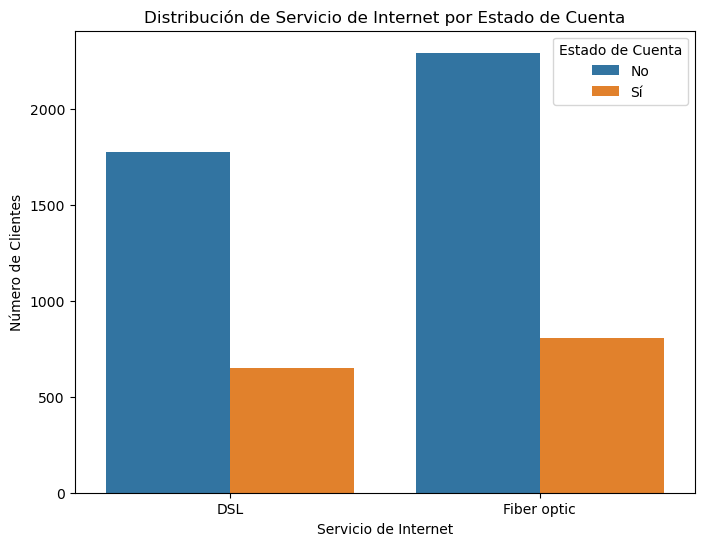

In [274]:
plt.figure(figsize=(8, 6))
sns.countplot(data=internet_df, x='InternetService', hue=contract_df['EndDate'], dodge=True)
plt.title('Distribución de Servicio de Internet por Estado de Cuenta')
plt.xlabel('Servicio de Internet')
plt.ylabel('Número de Clientes')
plt.legend(title='Estado de Cuenta', labels=['No', 'Sí'])
plt.show()

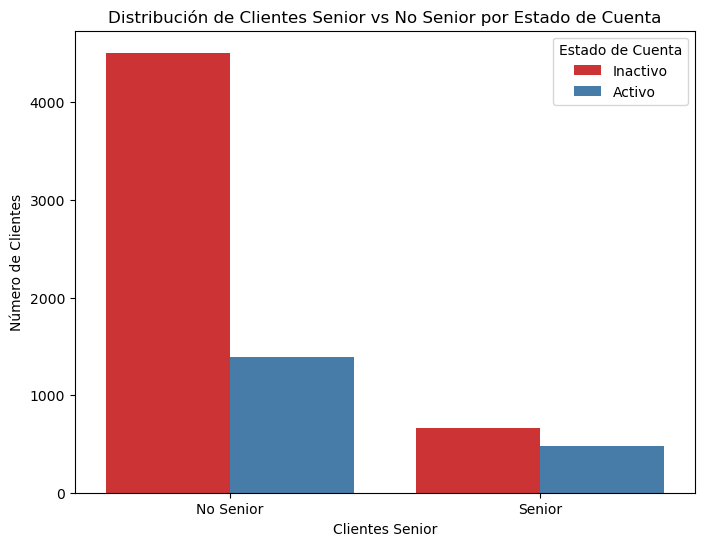

In [270]:
# Unir los dataframes personal_df y contract_df
merged_df = pd.merge(personal_df, contract_df[['customerID', 'EndDate']], on='customerID', how='left')

# Crear el countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', hue='EndDate', data=merged_df, palette='Set1')
plt.title('Distribución de Clientes Senior vs No Senior por Estado de Cuenta')
plt.xlabel('Clientes Senior')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['No Senior', 'Senior'])
plt.legend(title='Estado de Cuenta', labels=['Inactivo', 'Activo'])
plt.show()


/var/folders/w0/1h4jwr5n6csdx1zh9_8v6dd40000gn/T/ipykernel_4476/1920637729.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=contract_df['EndDate'], y=contract_df['MonthlyCharges'], palette='Set2')


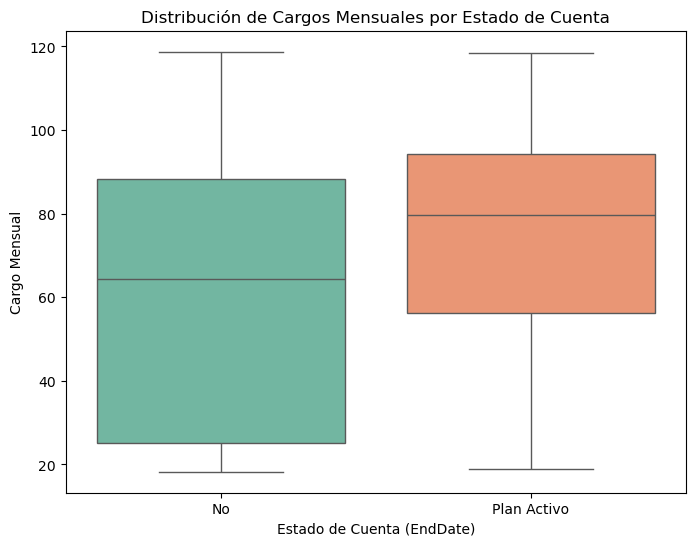

In [278]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=contract_df['EndDate'], y=contract_df['MonthlyCharges'], palette='Set2')
plt.title('Distribución de Cargos Mensuales por Estado de Cuenta')
plt.xlabel('Estado de Cuenta (EndDate)')
plt.ylabel('Cargo Mensual')
plt.show()

### **2.4 Análisis de las características de los servicios**
Verificamos qué servicios son más populares entre los clientes.

In [72]:
# Distribución de los servicios contratados
internet_df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
Name: count, dtype: int64

### **2.5 Identificación de posibles relaciones**
Basado en los análisis anteriores, se pueden identificar relaciones que podrían ser útiles para la predicción.

In [74]:
phone_df['MultipleLines'].value_counts()

MultipleLines
No     3390
Yes    2971
Name: count, dtype: int64

---
## **Paso 3: Preparación de los datos para el modelo**

En este paso, preparamos los datos de `contract.csv` para entrenar el modelo, utilizando las siguientes columnas:  
`customerID`, `BeginDate`, `EndDate`, `Type`, `PaperlessBilling`, `PaymentMethod`, `MonthlyCharges`, `TotalCharges`.

### **3.1 Selección y creación de la variable objetivo**
Definimos la variable objetivo: 1 si `EndDate` es `"No"` (cliente activo) y 0 en caso contrario.

In [78]:
# Crear la variable objetivo: 1 si EndDate es "No", 0 de lo contrario
y = (contract_df['EndDate'] == 'No').astype(int)

### **3.2 Selección de características**
Seleccionamos las columnas que consideramos relevantes para el modelo.

In [80]:
# Seleccionar las columnas de interés para las características
features = ['Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
X = contract_df[features]

### **3.3 Transformación de variables categóricas**
Convertimos las variables categóricas a variables dummy.

In [82]:
# Convertir variables categóricas en variables dummy, evitando la trampa de la multicolinealidad con drop_first=True
X = pd.get_dummies(X, drop_first=True)

### **3.4 División en conjuntos de entrenamiento y prueba**
Dividimos los datos en conjuntos de entrenamiento y prueba.

In [86]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **3.5 Normalización de los datos**
Normalizamos los datos para asegurar que todas las características estén en la misma escala.

In [90]:
# Instanciar y aplicar el escalador a los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---
## **Paso 4: Entrenamiento y evaluación del modelo**
Entrenamos un modelo de clasificación (Regresión Logística) y evaluamos su desempeño usando exactitud (accuracy) y AUC-ROC.

### **4.1 Entrenamiento del modelo**
Entrenamos el modelo utilizando los datos escalados.

In [95]:
# Instanciar el modelo de Regresión Logística
model = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)

# Entrenar el modelo con los datos escalados
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### **4.2 Evaluación del modelo**
Evaluamos el modelo calculando las métricas de exactitud y AUC-ROC, y mostramos el reporte de clasificación.

In [101]:
# Predecir probabilidades y clases en el conjunto de prueba
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
y_pred = model.predict(X_test_scaled)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)

print("Exactitud (Accuracy): {:.4f}".format(accuracy))
print("AUC-ROC: {:.4f}".format(auc_roc))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Exactitud (Accuracy): 0.7608
AUC-ROC: 0.7849

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.60      0.29      0.39       373
           1       0.79      0.93      0.85      1036

    accuracy                           0.76      1409
   macro avg       0.69      0.61      0.62      1409
weighted avg       0.74      0.76      0.73      1409



### **4.3 Entrenamiento y evaluación del Árbol de Decisión**

In [153]:
# Crear el modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predicciones
y_pred_dt = dt_model.predict(X_test)

# Evaluar el modelo
accuracy_dt = accuracy_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)

print(f"Árbol de Decisión - Exactitud: {accuracy_dt:.4f}")
print(f"Árbol de Decisión - AUC-ROC: {roc_auc_dt:.4f}")

Árbol de Decisión - Exactitud: 0.7665
Árbol de Decisión - AUC-ROC: 0.6568


### **4.3 Entrenamiento y evaluación del Random Forest**

In [163]:
# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print(f"Random Forest - Exactitud: {accuracy_rf:.4f}")
print(f"Random Forest - AUC-ROC: {roc_auc_rf:.4f}")

Random Forest - Exactitud: 0.7835
Random Forest - AUC-ROC: 0.6606


### **4.4 Comparación de los Modelos**
Una vez entrenados los tres modelos, podemos comparar los resultados de exactitud y AUC-ROC para ver cuál tiene el mejor rendimiento:

In [179]:
# Comparación de los resultados
print("Comparación de Modelos:")
print(f"Regresión Logística - Exactitud: {accuracy:.4f}, AUC-ROC: {auc_roc:.4f}")
print(f"Árbol de Decisión - Exactitud: {accuracy_dt:.4f}, AUC-ROC: {roc_auc_dt:.4f}")
print(f"Random Forest - Exactitud: {accuracy_rf:.4f}, AUC-ROC: {roc_auc_rf:.4f}")

Comparación de Modelos:
Regresión Logística - Exactitud: 0.7608, AUC-ROC: 0.7849
Árbol de Decisión - Exactitud: 0.7665, AUC-ROC: 0.6568
Random Forest - Exactitud: 0.7835, AUC-ROC: 0.6606


### **Comparación de Modelos**
Regresión Logística:

Exactitud: 0.7608
AUC-ROC: 0.7849
Árbol de Decisión:

Exactitud: 0.7665
AUC-ROC: 0.6568
Random Forest:

Exactitud: 0.7835
AUC-ROC: 0.6606
### **Conclusiones:**
Mejor Modelo: La Regresión Logística tiene el mejor valor de AUC-ROC (0.7849), lo que indica una mejor capacidad para discriminar entre las clases. Sin embargo, Random Forest tiene la mayor exactitud (0.7835), lo que sugiere que es el modelo más efectivo en términos de predicción directa.
Árbol de Decisión: Aunque tiene una exactitud relativamente alta (0.7665), su AUC-ROC es significativamente más bajo (0.6568), lo que sugiere que no discrimina tan bien entre los casos positivos y negativos en comparación con los otros dos modelos.
En resumen, si el objetivo principal es obtener un modelo con un mejor rendimiento en términos de clasificación binaria, la Regresión Logística parece ser la mejor opción. Si la prioridad es la exactitud general, Random Forest es el modelo a preferir.

---
## **Paso 5 Informe de Solución**

- **Pasos del Plan Realizados:**

    1. **Preparación de los datos**: Se prepararon los datos de `contract.csv`, seleccionando las columnas relevantes y creando la variable objetivo según la columna `EndDate`.
    2. **Entrenamiento de Modelos**: Se entrenaron tres modelos: **Regresión Logística**, **Árbol de Decisión** y **Random Forest**.
    3. **Evaluación de Modelos**: Se evaluaron los modelos utilizando las métricas de **Exactitud** (Accuracy) y **AUC-ROC**.
    4. **Comparación de Modelos**: Se compararon los tres modelos en función de sus puntuaciones de Exactitud y AUC-ROC para determinar cuál ofrece el mejor rendimiento.

- **Pasos Omitidos:**

No se omitieron pasos relevantes durante el proceso.

- **Dificultades Encontradas y Soluciones:**

1. **Ajuste de Hiperparámetros**: A pesar de no haber realizado una búsqueda exhaustiva de hiperparámetros (por ejemplo, grid search), los modelos fueron entrenados utilizando los parámetros predeterminados de cada uno.
   
2. **Errores de código**: Durante la comparación de los modelos, hubo un error relacionado con variables no definidas, lo cual fue solucionado asegurando que todas las variables de evaluación estuvieran correctamente inicializadas y utilizadas.

- **Pasos Clave para Resolver la Tarea:**

    1. **Definición de la Variable Objetivo**: La variable objetivo fue creada correctamente a partir de la columna `EndDate` en `contract.csv`.
    2. **Entrenamiento de Modelos**: Utilizamos **Regresión Logística**, **Árbol de Decisión** y **Random Forest**, que son adecuados para problemas de clasificación binaria.
    3. **Evaluación y Comparación**: Evaluamos el rendimiento de los modelos utilizando **Exactitud** y **AUC-ROC**, lo que nos permitió identificar el mejor modelo en términos de discriminación de clases y exactitud.

- **Modelo Final y Calidad:**

  1. **Mejor Modelo en Términos de AUC-ROC**: **Regresión Logística** con un AUC-ROC de 0.7849.
    2. **Mejor Modelo en Términos de Exactitud**: **Random Forest** con una Exactitud de 0.7835.

Aunque el modelo de **Regresión Logística** tiene el mejor AUC-ROC, **Random Forest** tiene la mayor Exactitud. Dependiendo de los objetivos del negocio (mayor exactitud o mejor discriminación entre clases), cualquiera de estos dos modelos podría ser seleccionado. El **Árbol de Decisión**, aunque tiene una exactitud relativamente buena, presenta un AUC-ROC mucho más bajo, lo que sugiere que no es tan efectivo en cuanto a la separación de clases.


---
# Plan de Trabajo

## Preguntas Aclaratorias:

1. ¿Existen otros archivos con datos adicionales que podrían ser útiles para el análisis o los modelos? 
2. ¿Cuál es el límite de tiempo para la entrega final del análisis y los modelos entrenados?
3. ¿Es importante considerar la interpretación de los resultados del modelo o simplemente debemos optimizar la precisión y el AUC-ROC?

## Plan para Resolver la Tarea:

1. **Cargar y Explorar los Datos**: 
   Se importarán los archivos necesarios, y se explorarán para comprender su estructura y detectar posibles problemas (valores faltantes, duplicados, etc.). 
   
2. **Preparar los Datos**: 
   Se limpiarán los datos, transformando las variables que sean necesarias, y creando la variable objetivo (cliente activo o no, según la columna `EndDate`).
   
3. **Entrenar Modelos**: 
   Se entrenarán varios modelos de clasificación, incluyendo Regresión Logística, Árbol de Decisión y Random Forest, utilizando las variables más relevantes.
   
4. **Evaluar los Modelos**: 
   Se evaluarán los modelos utilizando métricas clave como la Exactitud (Accuracy) y AUC-ROC para determinar cuál tiene el mejor rendimiento.

5. **Comparar y Seleccionar el Mejor Modelo**: 
   Se compararán los resultados de los modelos y se seleccionará el que tenga el mejor rendimiento en base a las métricas. Se analizará también si la precisión o la capacidad de discriminación son más relevantes para el caso de uso.
